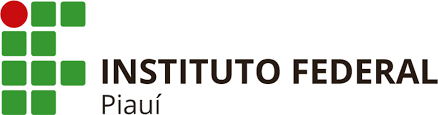

#CIBERSEGURANÇA NO BRASIL: uma análise sobre a distribuição da produção de artigos no período de 2014 a 2023#

#1. INTRODUÇÃO#
---

Esse trabalho consiste em uma análise de dados, realizada durante a disciplina de Metodologia da Pesquisa Científica, do curso de Análise e Desenvolvimento de Sistemas do Instituto Federal do Piauí - Campus Teresina Central, na qual foram avaliados alguns dados para obter informações que foram  utilizadas na composição de um artigo científico intitulado: "*CIBERSEGURANÇA NO BRASIL: uma análise sobre a distribuição da produção de artigos no período de 2014 a 2023*".

Os dados utilizados nessa análise foram obtidos a partir de uma revisão bibliográfica de artigos nacionais, publicados de 2014 a 2023, disponíveis na plataforma Periódicos CAPES, com tema focado em Cibersegurança.

Link para a base de dados coletada a partir dos artigos: https://docs.google.com/spreadsheets/d/1BpRAgeg86CNnQrZ8v40a8FYKY7d44D-glBNSFJGO_JI/edit?usp=sharing

##1.1 BIBLIOTECAS##

In [ ]:
import math as mt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

##1.2 DATASET##

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database_Artigo_Metodologia_da_Pesquisa_Cientifica - Página1.csv')
dataset

,Número,Título,Ano,Autores,Universidade,Região,Palavras-chaves
0,1.0,THE BRAZILIAN REACTIONS TO THE SNOWDEN AFFAIRS...,2015.0,Thiago Borne Ferreira,Universidade Federal do Rio Grande do Sul - UFRGS,Sul,Governança da Internet
1,NaN,NaN,NaN,Diego Rafael Canabarro,Universidade Federal do Rio Grande do Sul - UFRGS,Sul,Brasil
2,NaN,NaN,NaN,NaN,NaN,NaN,Cibersegurança
3,2.0,Um framework para planejamento e gerenciamento...,2022.0,Muriel Figueredo Franco,University of Zurich - UZH,Internacional,Cibersegurança
4,NaN,NaN,NaN,Fabricio Martins Lacerda,Universidade Estadual do Paraná - UNESPAR,Sul,Gerenciamento de riscos
...,...,...,...,...,...,...,...
84,NaN,NaN,NaN,Sylvio André Garcia Vieira,Universidade Franciscana - UFN,Sul,Segurança
85,NaN,NaN,NaN,NaN,NaN,NaN,Prevenção
86,21.0,Construtos audiovisuais de vigilância e privac...,2020.0,Camila de Ávila,Universidade do Vale do Rio dos Sinos - UNISINOS,Sul,Jogos Digitais
87,NaN,NaN,NaN,Leonardo Andrada de Mello,Universidade do Vale do Rio dos Sinos - UNISINOS,Sul,Tecnocultura


##1.3 FUNÇÃO PARA MONTAR LISTAS##

In [ ]:
def montar_lista(dataframe):
  lista = []

  for i in dataframe:
    if type(i) == float:
      if not mt.isnan(i):
        lista.append(i)
    else:
      lista.append(i)

  return lista

#2. ANO#
---

##2.1 QUATIDADE DE PUBLICAÇÕES POR ANO##

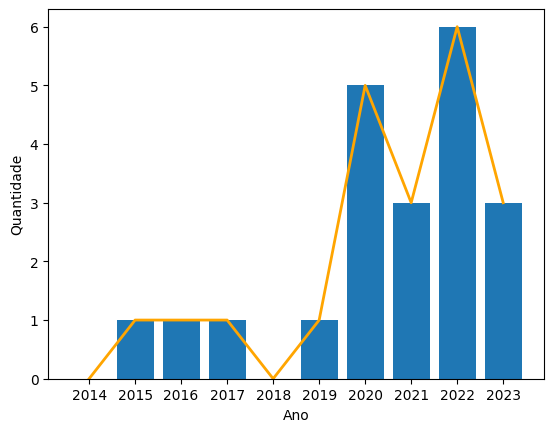

In [ ]:
anos_comparacao = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

anos_qtd = []

anos = montar_lista(dataset['Ano'])

for a_c in anos_comparacao:
  cont = 0
  for a in anos:
    if a_c == int(a):
      cont += 1
  anos_qtd.append(cont)

anos_qtd

x = np.array(anos_comparacao)
y = np.array(anos_qtd)

plt.plot(x, y, color='orange', linewidth=2)
plt.bar(x, y)
plt.xticks(range(2014, 2024, 1))
#plt.title('Quantidade de publicações por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show()

#3. AUTORES#
---

##3.1 QUANTIDADE DE AUTORES##

In [ ]:
autores = montar_lista(dataset['Autores'])
#dataset.Autores.value_counts()
len(autores)

52

#4. INSTUIÇÃO DE ENSINO#
---

##4.1 QUANTIDADE DE INSTITUIÇÕES DE ENSINO##

In [ ]:
universidades = montar_lista(dataset['Universidade'])

universidades_unicas = []

for u in universidades:
  if u in universidades_unicas:
    continue
  else:
    universidades_unicas.append(u)

len(universidades_unicas)

27

##4.2 QUANTIDADE DE AUTORES POR INSTITUIÇÃO DE ENSINO##

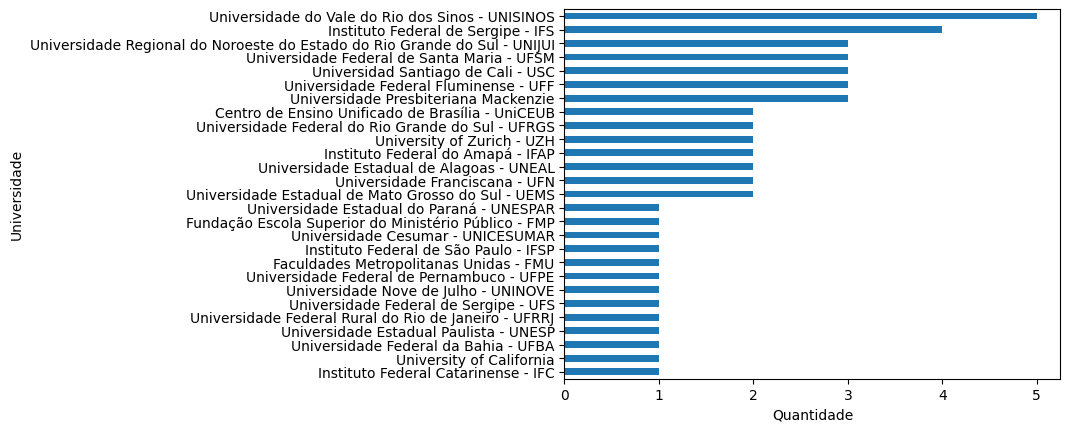

In [ ]:
universidades = montar_lista(dataset['Universidade'])
dataset.Universidade.value_counts().sort_values(ascending=True).plot(kind='barh')
#plt.title('Quantidade de autores por universidade')
plt.xlabel('Quantidade')
plt.ylabel('Universidade')
plt.show()

## 4.3 QUANTIDADE DE AUTORES POR LOCALIZAÇÃO GEOGRÁFICA##

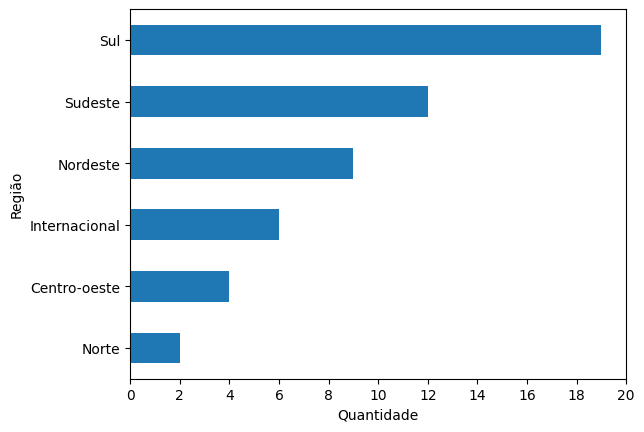

In [ ]:
regiao = montar_lista(dataset['Região'])

dataset.Região.value_counts().sort_values(ascending=True).plot(kind='barh')
plt.barh(x, y)
plt.xticks(range(0, 22, 2))
#plt.title('Quantidade de autores por região')
plt.xlabel('Quantidade')
plt.ylabel('Região')
plt.show()

#5. PALAVRAS-CHAVES#
---

##5.1 FREQUÊNCIA DAS PALAVRAS-CHAVES##

In [ ]:
palavras_chaves = montar_lista(dataset['Palavras-chaves'])

palavras_chaves_unicas = []

palavras_chaves_qtd = []

for p in palavras_chaves:
  if p in palavras_chaves_unicas:
    continue
  else:
    palavras_chaves_unicas.append(p)

for p_u in palavras_chaves_unicas:
  cont = 0
  for p in palavras_chaves:
    if p == p_u:
      cont += 1
  palavras_chaves_qtd.append(cont)

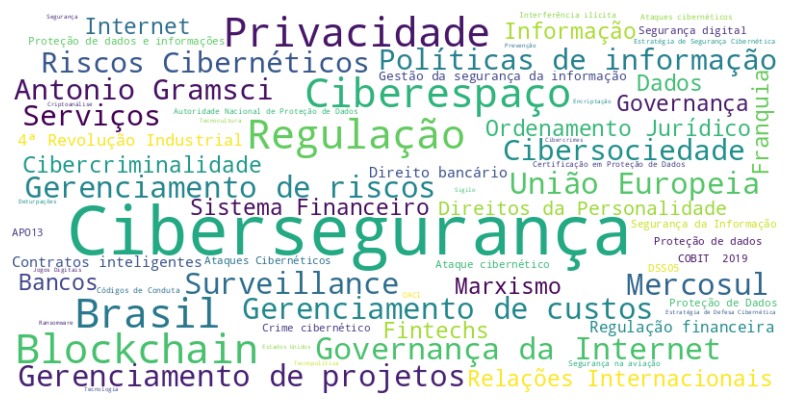

In [ ]:
# Define as palavras e suas frequências
text = {}

for i in range(len(palavras_chaves_unicas)):
      text[palavras_chaves_unicas[i]] = palavras_chaves_qtd[i]

# Cria a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(text)

# Exibe a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
count = 0

for p, q in zip(palavras_chaves_unicas, palavras_chaves_qtd):
  if q >= 2 and q < 10:
    count += 1
  print(p, q)

print(count)

Governança da Internet 1
Brasil 2
Cibersegurança 10
Gerenciamento de riscos 1
Gerenciamento de custos 1
Gerenciamento de projetos 1
Mercosul 1
Privacidade 2
Surveillance 1
União Europeia 1
Políticas de informação 1
Ciberespaço 2
Cibersociedade 1
Serviços 1
Riscos Cibernéticos 1
Antonio Gramsci 1
Relações Internacionais 1
Internet 1
Marxismo 1
Informação 1
Dados 1
Cibercriminalidade 1
Governança 1
Sistema Financeiro 1
Bancos 1
Fintechs 1
Franquia 1
Blockchain 2
Ordenamento Jurídico 1
Direitos da Personalidade 1
4ª Revolução Industrial 1
Regulação financeira 1
Contratos inteligentes 1
Direito bancário 1
Gestão da segurança da informação 1
Proteção de dados e informações 1
Ataque cibernético 1
Crime cibernético 1
Proteção de dados 1
Segurança digital 1
COBIT  2019 1
Segurança da Informação 1
Ataques Cibernéticos 1
APO13 1
DSS05 1
Proteção de Dados 1
Autoridade Nacional de Proteção de Dados 1
Regulação 2
Certificação em Proteção de Dados 1
Códigos de Conduta 1
Ataques cibernéticos 1
Interf

##5.2 QUANTIDADE DE PALAVRAS-CHAVES##

In [ ]:
len(palavras_chaves_unicas)

69